# IRIS DATASET CLASSIFICATION PROJECT
### Submitted by: Nikhil Khatri (2023BALA07ALA047)
### Submitted to: Prof. Geeta Rani
### Alliance University, Bengaluru
### April 2025

## 1. Introduction

The Iris dataset is one of the most widely used datasets in data science and machine learning.
It includes 150 samples of iris flowers with four features — sepal length, sepal width, petal length, and petal width.
The goal of this project is to classify the flowers into three species:
**Iris setosa, Iris versicolor, and Iris virginica**.

---

## Step 1: Import Libraries and Load Dataset

In [16]:
#Importing essential libraries
from sklearn.cluster import AgglomerativeClustering
import sklearn.cluster
from sklearn.preprocessing import StandardScaler
import pandas as pd
from matplotlib import pyplot
import numpy as np
import tensorflow
from keras import layers
import keras
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns

# Load the dataset
df= pd.read_csv("C:/Users/loq/Projects/Iris Dataset/Iris-Dataset-Models/Iris.csv")

In [24]:
sns.set_theme(style='whitegrid')
pyplot.rcParams['figure.figsize'] = (8,6)

## Step 2: Data Exploration

In [17]:
# Basic info
print(df.shape)

(150, 6)


In [18]:
# Summary statistics
print(df.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


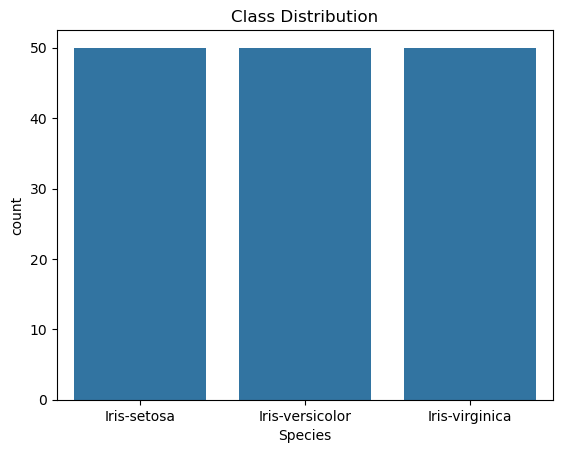

In [7]:
# value count of each species
df["Species"].value_counts()
sns.countplot(x='Species', data=df); pyplot.title('Class Distribution');

## Step 3: Data Preprocessing and Encoding

In [3]:
#check for missing values
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

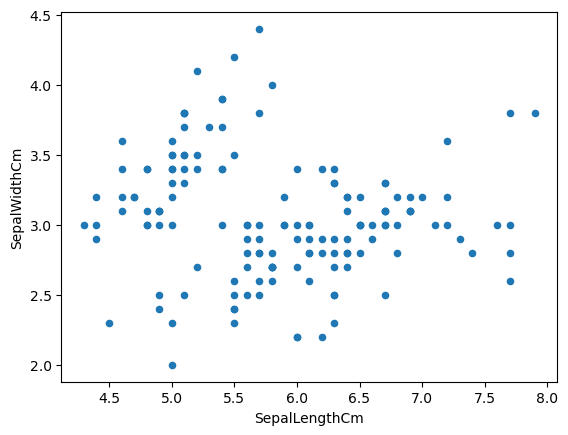

In [15]:
# Feature visualization using scatterplot
df.plot(kind="scatter", x="SepalLengthCm", y="SepalWidthCm")

Text(0.5, 1.0, 'Petal Length by Species')

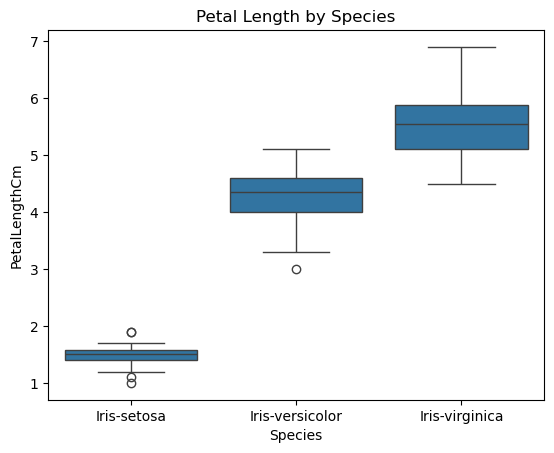

In [22]:
# We can look at an individual feature in Seaborn through a boxplot
sns.boxplot(x="Species", y="PetalLengthCm", data=df)
pyplot.title("Petal Length by Species")

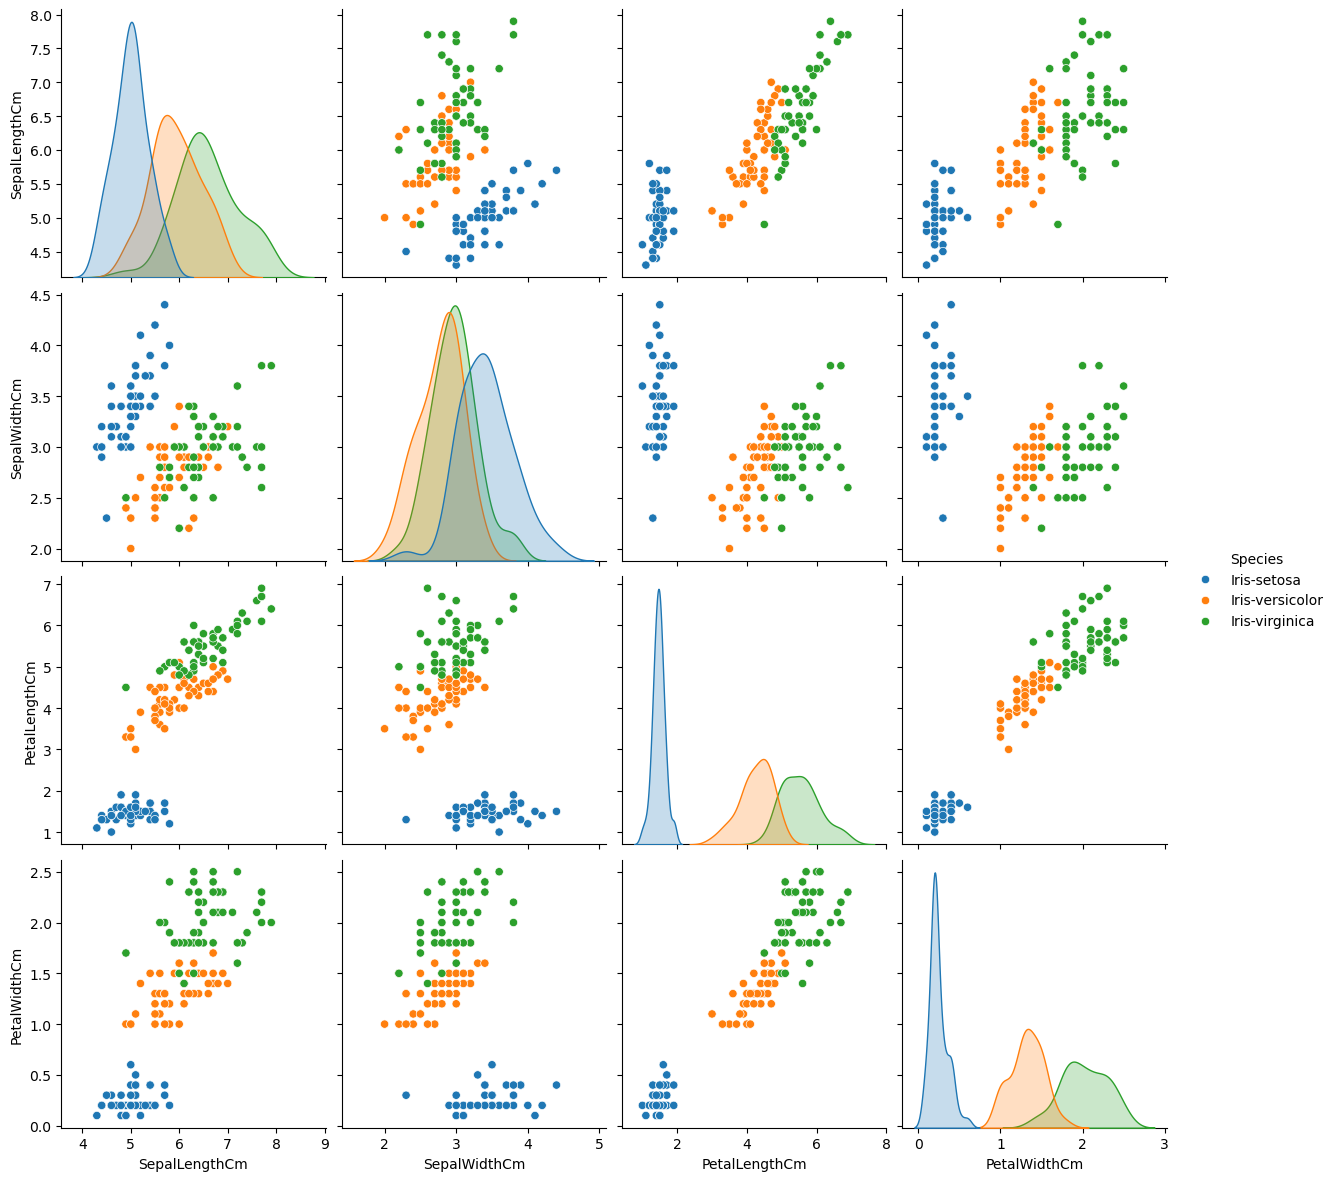

In [5]:
# Pairplot for feature comparision
sns.pairplot(df.drop("Id", axis=1), hue="Species", height=3)

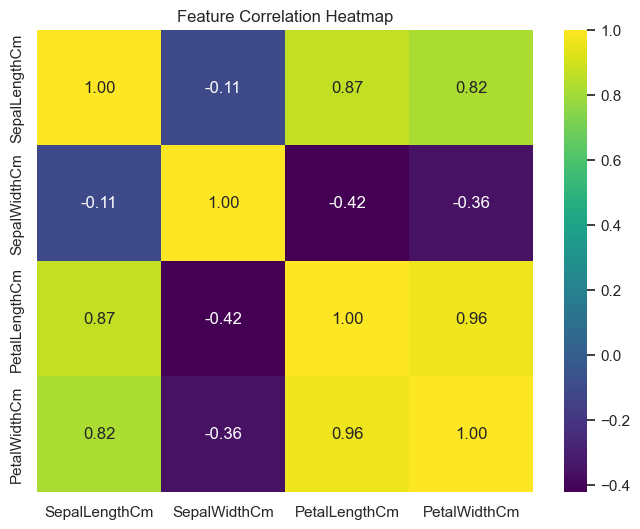

In [50]:
pyplot.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['Species']).corr(), annot=True, cmap='viridis', fmt='.2f')
pyplot.title('Feature Correlation Heatmap')
pyplot.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])
del df["Id"]

## Step 4: Clustering Techniques (Unsupervised Learning)

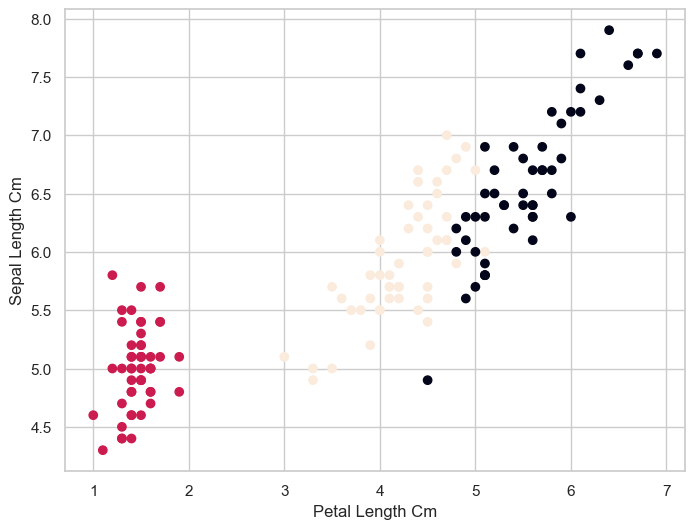

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [36]:
Mc= AgglomerativeClustering(n_clusters=3,metric="euclidean", linkage= "ward")
Mc.fit(df)
labels= Mc.fit_predict(df)
pyplot.scatter(np.array(df["PetalLengthCm"]), np.array(df["SepalLengthCm"]), c=labels)
pyplot.xlabel("Petal Length Cm")
pyplot.ylabel("Sepal Length Cm")
pyplot.show()
labels

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than availabl

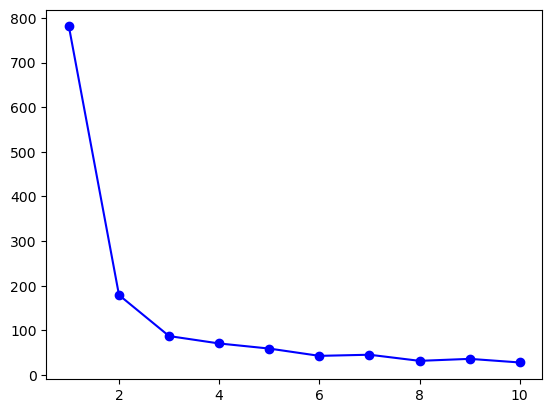

In [71]:
## this code is for kMeans clustering
inertia_range = range(1,11)
inertias = []
for i in inertia_range:
    model= sklearn.cluster.KMeans(n_clusters = i)
    model.fit(df)
    inertias.append(model.inertia_)
pyplot.plot(inertia_range, inertias, "o-b")

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


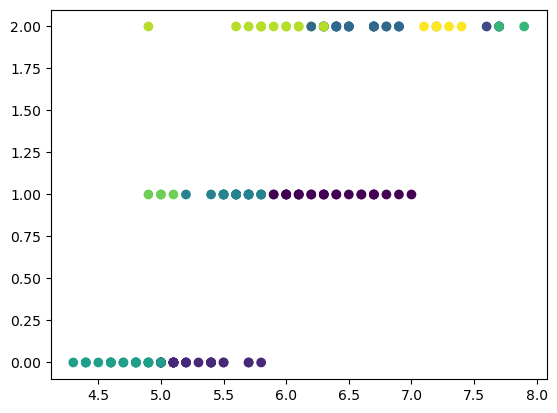

In [72]:
modelk = sklearn.cluster.KMeans(n_clusters= 3)
modelk.fit(df)
labels= model.predict(df)
pyplot.scatter(df["SepalLengthCm"], df["Species"], c=labels)

In [27]:
X_train = df[["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]
Y_train = df["Species"]

In [38]:
print(df["Species"].value_counts())
print(df["Species"].unique())

Species
0    50
1    50
2    50
Name: count, dtype: int64
[0 1 2]


In [33]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(5, random_state=42)
model.fit(X_train, Y_train)
model.predict(np.array([[4.9,3.0,1.4,0.2]]))

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix
print("Accuracy:", accuracy_score(Y_train, model.predict(X_train)))

Accuracy: 0.9866666666666667


In [73]:
scaler = StandardScaler()
scaled_data= scaler.fit_transform(df)
modelk.fit(scaled_data)
labels = modelk.predict(scaled_data)
newdf = pd.DataFrame({"Species": df["Species"], "label":labels})
pd.crosstab(newdf["Species"], newdf["label"])

E:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


label     0   1   2
Species            
0.0       0  50   0
1.0       8   0  42
2.0      47   0   3

In [39]:
model = DecisionTreeClassifier()
model.fit(X_train,Y_train)
prediction=model.predict(np.array([[4.9,3.0,1.4,0.2]]))
print(prediction)

[0]


E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


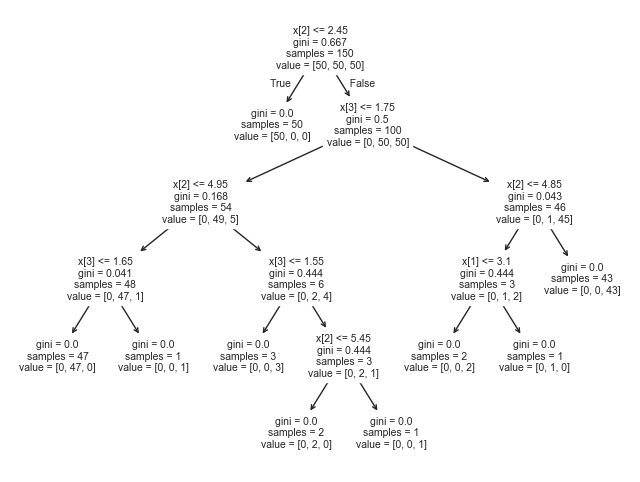

In [40]:
from sklearn import tree
tree.plot_tree(model);

## Neural Network Experiment

In [46]:
X= np.array(df[["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]])
Y= np.array(df["Species"])
models = tensorflow.keras.Sequential([
    tensorflow.keras.layers.Dense(4, activation="relu", input_shape=[4]),
    tensorflow.keras.layers.Dense(50, activation="relu"),
    tensorflow.keras.layers.Dense(1, activation="relu")])
models.compile(loss = "mae", optimizer = "Adam")

E:\anaconda\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
history = models.fit(X,Y, epochs=20, validation_split = 0.2)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 401ms/step - loss: 3.9113 - val_loss: 2.3467
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 129ms/step - loss: 3.3300 - val_loss: 1.6126
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 160ms/step - loss: 2.7293 - val_loss: 0.9087
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - loss: 2.0107 - val_loss: 0.2487
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step - loss: 1.4761 - val_loss: 0.4165
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 126ms/step - loss: 1.0341 - val_loss: 0.9952
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step - loss: 0.8564 - val_loss: 1.4360
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 120ms/step - loss: 0.8764 - val_loss: 1.6543
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - loss: 0.8629 - val_loss: 1.7067
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.8772 - val_loss: 1.6532
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - loss: 0.7938 - val_loss: 1.5214
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.7239 - val_lo

In [48]:
newy= models.predict(np.array([5.5,2.3,4.0,1.3]).reshape(-1,4))
newy.round()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 490ms/step


array([[1.]], dtype=float32)

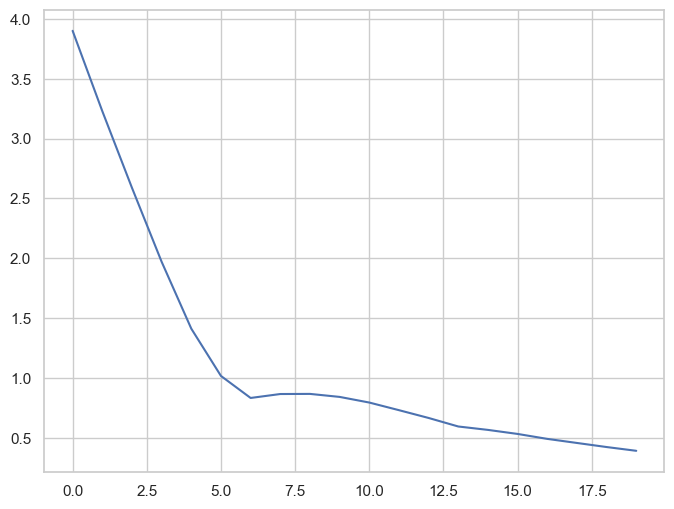

In [49]:
pyplot.plot(history.history['loss']);

### Summary of Observations

- Random Forest Classifier achieved the most consistent results.  
- Clustering methods roughly separated species but lacked precision.  
- Neural network performed similarly to classical ML models.


## Conclusion
This notebook demonstrated both supervised (Decision Tree, Random Forest) and unsupervised (KMeans, Agglomerative) learning on the Iris dataset.  
Among all, Random Forest produced the most reliable classification accuracy.  
The project showcases data preprocessing, visualization, and basic model training skills suitable for semester evaluation.
